In [1]:
# Import required libraries
%pip install optuna
import pandas as pd
import numpy as np
import os, random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import optuna

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Set constant seed for reproducibility + deterministic settings
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
random.seed(SEED)
np.random.seed(SEED)
# Remove optuna.seed(SEED) as it does not exist


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Downgrade numpy for TensorFlow compatibility (run this cell and restart kernel)
%pip install numpy==1.26.4


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load dataset and select top 14 features
features = ['RiskScore', 'MonthlyCharges', 'EstimatedCLV', 'tenure', 'ContractRisk', 'PaymentRisk', 'PhoneService', 'AvgChargesPerMonth', 'TechSupport', 'OnlineSecurity', 'TotalCharges', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']
df = pd.read_csv('final_telco_engineered.csv')
X = df[features]
# Assuming target column is 'Churn' (update if different)
y = df['Churn']

In [4]:
# Identify categorical and numerical columns for preprocessing
categorical_cols = ['SeniorCitizen', 'PhoneService', 'TechSupport', 'OnlineSecurity', 'PaperlessBilling', 'PaymentMethod']
numerical_cols = [col for col in features if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [5]:
# Train/validation/test split (80/10/10)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=SEED, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=SEED, stratify=y_temp)
# 0.1111 * 0.90 ≈ 0.10

In [6]:
# Ensure target variable is numeric (0/1)
if y_train.dtype == 'O' or y_train.dtype.name == 'category':
    y_train = y_train.map({'No': 0, 'Yes': 1}).astype(int)
    y_val = y_val.map({'No': 0, 'Yes': 1}).astype(int)
    y_test = y_test.map({'No': 0, 'Yes': 1}).astype(int)

In [7]:
# Fit preprocessor and transform data
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[I 2025-12-04 15:57:06,554] A new study created in memory with name: no-name-4e325ac8-a259-4bf4-acf0-50403f98b2a8
  0%|          | 0/50 [00:00<?, ?it/s]2025-12-04 15:57:06.573341: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-12-04 15:57:06.573381: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-12-04 15:57:06.573390: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-12-04 15:57:06.573417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-04 15

Early stopping at epoch 10; best val F1=0.6414
Trial early stopped at epoch 10 (best val F1=0.6414)
[I 2025-12-04 15:57:16,640] Trial 0 finished with value: 0.6413502109704642 and parameters: {'n_units': 58, 'lr': 0.007969454818643935, 'dropout': 0.36599697090570255, 'batch_size': 90}. Best is trial 0 with value: 0.6413502109704642.


Best trial: 0. Best value: 0.64135:   4%|▍         | 2/50 [00:18<07:08,  8.92s/it]

Early stopping at epoch 9; best val F1=0.6352
Trial early stopped at epoch 9 (best val F1=0.6352)
[I 2025-12-04 15:57:24,754] Trial 1 finished with value: 0.6352459016393442 and parameters: {'n_units': 33, 'lr': 0.00020511104188433984, 'dropout': 0.02904180608409973, 'batch_size': 116}. Best is trial 0 with value: 0.6413502109704642.


Best trial: 0. Best value: 0.64135:   6%|▌         | 3/50 [00:27<06:59,  8.93s/it]

Early stopping at epoch 7; best val F1=0.6405
Trial early stopped at epoch 7 (best val F1=0.6405)
[I 2025-12-04 15:57:33,700] Trial 2 finished with value: 0.640495867768595 and parameters: {'n_units': 83, 'lr': 0.0026070247583707684, 'dropout': 0.010292247147901223, 'batch_size': 126}. Best is trial 0 with value: 0.6413502109704642.


Best trial: 3. Best value: 0.641822:   8%|▊         | 4/50 [00:54<12:21, 16.11s/it]

Early stopping at epoch 12; best val F1=0.6418
Trial early stopped at epoch 12 (best val F1=0.6418)
[I 2025-12-04 15:58:00,807] Trial 3 finished with value: 0.6418219461697723 and parameters: {'n_units': 110, 'lr': 0.00026587543983272726, 'dropout': 0.09091248360355031, 'batch_size': 49}. Best is trial 3 with value: 0.6418219461697723.


Best trial: 3. Best value: 0.641822:  10%|█         | 5/50 [01:26<16:19, 21.76s/it]

Early stopping at epoch 11; best val F1=0.6379
Trial early stopped at epoch 11 (best val F1=0.6379)
[I 2025-12-04 15:58:32,580] Trial 4 finished with value: 0.6378600823045267 and parameters: {'n_units': 50, 'lr': 0.0011207606211860567, 'dropout': 0.21597250932105788, 'batch_size': 60}. Best is trial 3 with value: 0.6418219461697723.


Best trial: 3. Best value: 0.641822:  12%|█▏        | 6/50 [01:47<15:46, 21.51s/it]

Early stopping at epoch 11; best val F1=0.6375
Trial early stopped at epoch 11 (best val F1=0.6375)
[I 2025-12-04 15:58:53,603] Trial 5 finished with value: 0.6375 and parameters: {'n_units': 85, 'lr': 0.00019010245319870352, 'dropout': 0.14607232426760908, 'batch_size': 67}. Best is trial 3 with value: 0.6418219461697723.


Best trial: 3. Best value: 0.641822:  14%|█▍        | 7/50 [02:03<14:18, 19.98s/it]

Early stopping at epoch 10; best val F1=0.6387
Trial early stopped at epoch 10 (best val F1=0.6387)
[I 2025-12-04 15:59:10,428] Trial 6 finished with value: 0.6386554621848739 and parameters: {'n_units': 67, 'lr': 0.0037183641805732083, 'dropout': 0.09983689107917987, 'batch_size': 81}. Best is trial 3 with value: 0.6418219461697723.


Best trial: 3. Best value: 0.641822:  16%|█▌        | 8/50 [02:42<18:04, 25.83s/it]

Early stopping at epoch 17; best val F1=0.6403
Trial early stopped at epoch 17 (best val F1=0.6403)
[I 2025-12-04 15:59:48,783] Trial 7 finished with value: 0.6403326403326404 and parameters: {'n_units': 82, 'lr': 0.0001238513729886094, 'dropout': 0.3037724259507192, 'batch_size': 48}. Best is trial 3 with value: 0.6418219461697723.


Best trial: 8. Best value: 0.647423:  18%|█▊        | 9/50 [02:55<14:52, 21.77s/it]

Early stopping at epoch 8; best val F1=0.6474
Trial early stopped at epoch 8 (best val F1=0.6474)
[I 2025-12-04 16:00:01,632] Trial 8 finished with value: 0.6474226804123712 and parameters: {'n_units': 23, 'lr': 0.007902619549708232, 'dropout': 0.4828160165372797, 'batch_size': 110}. Best is trial 8 with value: 0.6474226804123712.


Best trial: 8. Best value: 0.647423:  20%|██        | 10/50 [03:17<14:39, 21.99s/it]

Early stopping at epoch 12; best val F1=0.6380
Trial early stopped at epoch 12 (best val F1=0.6380)
[I 2025-12-04 16:00:24,123] Trial 9 finished with value: 0.6380368098159509 and parameters: {'n_units': 50, 'lr': 0.0001567993391672301, 'dropout': 0.34211651325607845, 'batch_size': 74}. Best is trial 8 with value: 0.6474226804123712.


Best trial: 8. Best value: 0.647423:  22%|██▏       | 11/50 [03:38<14:07, 21.72s/it]

Early stopping at epoch 15; best val F1=0.6474
Trial early stopped at epoch 15 (best val F1=0.6474)
[I 2025-12-04 16:00:45,222] Trial 10 finished with value: 0.6474226804123712 and parameters: {'n_units': 18, 'lr': 0.0008844120332118486, 'dropout': 0.4847685553939329, 'batch_size': 104}. Best is trial 8 with value: 0.6474226804123712.


Best trial: 8. Best value: 0.647423:  24%|██▍       | 12/50 [04:06<14:53, 23.53s/it]

Early stopping at epoch 18; best val F1=0.6281
Trial early stopped at epoch 18 (best val F1=0.6281)
[I 2025-12-04 16:01:12,877] Trial 11 finished with value: 0.628099173553719 and parameters: {'n_units': 17, 'lr': 0.0006358132707613782, 'dropout': 0.49355105526407606, 'batch_size': 105}. Best is trial 8 with value: 0.6474226804123712.


Best trial: 8. Best value: 0.647423:  26%|██▌       | 13/50 [04:22<13:11, 21.39s/it]

Early stopping at epoch 10; best val F1=0.6296
Trial early stopped at epoch 10 (best val F1=0.6296)
[I 2025-12-04 16:01:29,355] Trial 12 finished with value: 0.6296296296296297 and parameters: {'n_units': 19, 'lr': 0.0009583839722220977, 'dropout': 0.4977994648804881, 'batch_size': 99}. Best is trial 8 with value: 0.6474226804123712.


Best trial: 8. Best value: 0.647423:  28%|██▊       | 14/50 [04:41<12:16, 20.45s/it]

Early stopping at epoch 12; best val F1=0.6473
Trial early stopped at epoch 12 (best val F1=0.6473)
[I 2025-12-04 16:01:47,630] Trial 13 finished with value: 0.6473029045643154 and parameters: {'n_units': 36, 'lr': 0.009635778184330245, 'dropout': 0.4258956616045496, 'batch_size': 109}. Best is trial 8 with value: 0.6474226804123712.


Best trial: 8. Best value: 0.647423:  30%|███       | 15/50 [04:55<10:50, 18.60s/it]

Early stopping at epoch 9; best val F1=0.6380
Trial early stopped at epoch 9 (best val F1=0.6380)
[I 2025-12-04 16:02:01,940] Trial 14 finished with value: 0.6380368098159509 and parameters: {'n_units': 34, 'lr': 0.0021786936802595702, 'dropout': 0.41637235233837006, 'batch_size': 123}. Best is trial 8 with value: 0.6474226804123712.


Best trial: 8. Best value: 0.647423:  32%|███▏      | 16/50 [05:13<10:25, 18.39s/it]

Early stopping at epoch 10; best val F1=0.6403
Trial early stopped at epoch 10 (best val F1=0.6403)
[I 2025-12-04 16:02:19,828] Trial 15 finished with value: 0.6403326403326404 and parameters: {'n_units': 119, 'lr': 0.00044697688838941463, 'dropout': 0.2528545008858366, 'batch_size': 95}. Best is trial 8 with value: 0.6474226804123712.


Best trial: 16. Best value: 0.647541:  34%|███▍      | 17/50 [05:35<10:40, 19.42s/it]

Early stopping at epoch 13; best val F1=0.6475
Trial early stopped at epoch 13 (best val F1=0.6475)
[I 2025-12-04 16:02:41,636] Trial 16 finished with value: 0.6475409836065574 and parameters: {'n_units': 17, 'lr': 0.0013798050279392204, 'dropout': 0.4232524773594687, 'batch_size': 85}. Best is trial 16 with value: 0.6475409836065574.


Best trial: 16. Best value: 0.647541:  36%|███▌      | 18/50 [05:59<11:07, 20.86s/it]

Early stopping at epoch 7; best val F1=0.6400
Trial early stopped at epoch 7 (best val F1=0.6400)
[I 2025-12-04 16:03:05,868] Trial 17 finished with value: 0.64 and parameters: {'n_units': 33, 'lr': 0.004896924658898313, 'dropout': 0.4179974908603934, 'batch_size': 35}. Best is trial 16 with value: 0.6475409836065574.


Best trial: 16. Best value: 0.647541:  38%|███▊      | 19/50 [06:17<10:24, 20.14s/it]

Early stopping at epoch 9; best val F1=0.6434
Trial early stopped at epoch 9 (best val F1=0.6434)
[I 2025-12-04 16:03:24,332] Trial 18 finished with value: 0.6434426229508197 and parameters: {'n_units': 45, 'lr': 0.0020578481814000718, 'dropout': 0.36800725590962186, 'batch_size': 88}. Best is trial 16 with value: 0.6475409836065574.


Best trial: 16. Best value: 0.647541:  40%|████      | 20/50 [06:45<11:11, 22.39s/it]

Early stopping at epoch 14; best val F1=0.6430
Trial early stopped at epoch 14 (best val F1=0.6430)
[I 2025-12-04 16:03:51,947] Trial 19 finished with value: 0.6430062630480167 and parameters: {'n_units': 98, 'lr': 0.005815435483376359, 'dropout': 0.26114942161906063, 'batch_size': 115}. Best is trial 16 with value: 0.6475409836065574.


Best trial: 16. Best value: 0.647541:  42%|████▏     | 21/50 [07:14<11:46, 24.38s/it]

Early stopping at epoch 7; best val F1=0.6462
Trial early stopped at epoch 7 (best val F1=0.6462)
[I 2025-12-04 16:04:20,963] Trial 20 finished with value: 0.6462167689161554 and parameters: {'n_units': 68, 'lr': 0.0013439862992296976, 'dropout': 0.44875782834507716, 'batch_size': 79}. Best is trial 16 with value: 0.6475409836065574.


Best trial: 16. Best value: 0.647541:  44%|████▍     | 22/50 [07:37<11:10, 23.94s/it]

Early stopping at epoch 14; best val F1=0.6354
Trial early stopped at epoch 14 (best val F1=0.6354)
[I 2025-12-04 16:04:43,893] Trial 21 finished with value: 0.6354378818737271 and parameters: {'n_units': 22, 'lr': 0.0004885870204911011, 'dropout': 0.46301984504115157, 'batch_size': 101}. Best is trial 16 with value: 0.6475409836065574.


Best trial: 16. Best value: 0.647541:  46%|████▌     | 23/50 [07:56<10:06, 22.47s/it]

Early stopping at epoch 11; best val F1=0.6349
Trial early stopped at epoch 11 (best val F1=0.6349)
[I 2025-12-04 16:05:02,935] Trial 22 finished with value: 0.6348547717842323 and parameters: {'n_units': 27, 'lr': 0.0007585643802917522, 'dropout': 0.3881051710578923, 'batch_size': 111}. Best is trial 16 with value: 0.6475409836065574.


Best trial: 23. Best value: 0.650307:  48%|████▊     | 24/50 [08:20<09:53, 22.83s/it]

Early stopping at epoch 12; best val F1=0.6503
Trial early stopped at epoch 12 (best val F1=0.6503)
[I 2025-12-04 16:05:26,585] Trial 23 finished with value: 0.6503067484662577 and parameters: {'n_units': 16, 'lr': 0.0015812614253601209, 'dropout': 0.47023446784837536, 'batch_size': 91}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  50%|█████     | 25/50 [08:39<09:04, 21.76s/it]

Early stopping at epoch 9; best val F1=0.6420
Trial early stopped at epoch 9 (best val F1=0.6420)
[I 2025-12-04 16:05:45,868] Trial 24 finished with value: 0.6419753086419753 and parameters: {'n_units': 44, 'lr': 0.0015505643706897514, 'dropout': 0.3146643330149077, 'batch_size': 87}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  52%|█████▏    | 26/50 [09:00<08:36, 21.51s/it]

Early stopping at epoch 10; best val F1=0.6449
Trial early stopped at epoch 10 (best val F1=0.6449)
[I 2025-12-04 16:06:06,791] Trial 25 finished with value: 0.6448979591836734 and parameters: {'n_units': 28, 'lr': 0.0034926154925683014, 'dropout': 0.44899051739381124, 'batch_size': 95}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  54%|█████▍    | 27/50 [09:20<08:09, 21.27s/it]

Early stopping at epoch 8; best val F1=0.6221
Trial early stopped at epoch 8 (best val F1=0.6221)
[I 2025-12-04 16:06:27,487] Trial 26 finished with value: 0.6221294363256785 and parameters: {'n_units': 16, 'lr': 0.0003227569203929276, 'dropout': 0.40343539814798374, 'batch_size': 70}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  56%|█████▌    | 28/50 [09:46<08:16, 22.55s/it]

Early stopping at epoch 12; best val F1=0.6392
Trial early stopped at epoch 12 (best val F1=0.6392)
[I 2025-12-04 16:06:53,033] Trial 27 finished with value: 0.6391752577319587 and parameters: {'n_units': 41, 'lr': 0.001798206872845896, 'dropout': 0.4630810779476102, 'batch_size': 84}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  58%|█████▊    | 29/50 [10:05<07:28, 21.38s/it]

Early stopping at epoch 9; best val F1=0.6474
Trial early stopped at epoch 9 (best val F1=0.6474)
[I 2025-12-04 16:07:11,670] Trial 28 finished with value: 0.6474226804123712 and parameters: {'n_units': 58, 'lr': 0.002979176460927805, 'dropout': 0.1919483744528934, 'batch_size': 119}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  60%|██████    | 30/50 [10:24<06:55, 20.79s/it]

Early stopping at epoch 7; best val F1=0.6417
Trial early stopped at epoch 7 (best val F1=0.6417)
[I 2025-12-04 16:07:31,104] Trial 29 finished with value: 0.6416666666666667 and parameters: {'n_units': 24, 'lr': 0.0066379807161963626, 'dropout': 0.35081679110469544, 'batch_size': 89}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  62%|██████▏   | 31/50 [10:51<07:09, 22.60s/it]

Early stopping at epoch 10; best val F1=0.6460
Trial early stopped at epoch 10 (best val F1=0.6460)
[I 2025-12-04 16:07:57,926] Trial 30 finished with value: 0.6459627329192547 and parameters: {'n_units': 57, 'lr': 0.003935461796991321, 'dropout': 0.29284748766601754, 'batch_size': 95}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  64%|██████▍   | 32/50 [11:14<06:47, 22.64s/it]

Early stopping at epoch 12; best val F1=0.6364
Trial early stopped at epoch 12 (best val F1=0.6364)
[I 2025-12-04 16:08:20,656] Trial 31 finished with value: 0.6363636363636364 and parameters: {'n_units': 24, 'lr': 0.0006613644475520923, 'dropout': 0.49945039606121394, 'batch_size': 105}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  66%|██████▌   | 33/50 [11:36<06:25, 22.69s/it]

Early stopping at epoch 12; best val F1=0.6432
Trial early stopped at epoch 12 (best val F1=0.6432)
[I 2025-12-04 16:08:43,451] Trial 32 finished with value: 0.6431535269709544 and parameters: {'n_units': 17, 'lr': 0.0010199865444900085, 'dropout': 0.47160100829939416, 'batch_size': 104}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  68%|██████▊   | 34/50 [11:59<06:02, 22.66s/it]

Early stopping at epoch 12; best val F1=0.6474
Trial early stopped at epoch 12 (best val F1=0.6474)
[I 2025-12-04 16:09:06,054] Trial 33 finished with value: 0.6474226804123712 and parameters: {'n_units': 29, 'lr': 0.0013472891274456452, 'dropout': 0.3867418008510462, 'batch_size': 112}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  70%|███████   | 35/50 [12:24<05:51, 23.40s/it]

Early stopping at epoch 11; best val F1=0.6407
Trial early stopped at epoch 11 (best val F1=0.6407)
[I 2025-12-04 16:09:31,180] Trial 34 finished with value: 0.6406570841889117 and parameters: {'n_units': 39, 'lr': 0.0008178526804438886, 'dropout': 0.43946698075905755, 'batch_size': 94}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  72%|███████▏  | 36/50 [12:43<05:09, 22.10s/it]

Early stopping at epoch 10; best val F1=0.6448
Trial early stopped at epoch 10 (best val F1=0.6448)
[I 2025-12-04 16:09:50,249] Trial 35 finished with value: 0.6447638603696099 and parameters: {'n_units': 29, 'lr': 0.0025478789318600812, 'dropout': 0.4721267521216703, 'batch_size': 126}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  74%|███████▍  | 37/50 [13:10<05:06, 23.57s/it]

Early stopping at epoch 12; best val F1=0.6364
Trial early stopped at epoch 12 (best val F1=0.6364)
[I 2025-12-04 16:10:17,244] Trial 36 finished with value: 0.6363636363636364 and parameters: {'n_units': 23, 'lr': 0.00048193832329644886, 'dropout': 0.3820919738182888, 'batch_size': 77}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  76%|███████▌  | 38/50 [13:45<05:22, 26.86s/it]

Early stopping at epoch 20; best val F1=0.6385
Trial early stopped at epoch 20 (best val F1=0.6385)
[I 2025-12-04 16:10:51,775] Trial 37 finished with value: 0.638477801268499 and parameters: {'n_units': 33, 'lr': 0.00029561947825291, 'dropout': 0.4336143173423512, 'batch_size': 99}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  78%|███████▊  | 39/50 [14:16<05:09, 28.14s/it]

Early stopping at epoch 12; best val F1=0.6421
Trial early stopped at epoch 12 (best val F1=0.6421)
[I 2025-12-04 16:11:22,923] Trial 38 finished with value: 0.6421267893660532 and parameters: {'n_units': 47, 'lr': 0.0012314058142698552, 'dropout': 0.48174214537278415, 'batch_size': 62}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  80%|████████  | 40/50 [14:42<04:36, 27.65s/it]

Early stopping at epoch 16; best val F1=0.6449
Trial early stopped at epoch 16 (best val F1=0.6449)
[I 2025-12-04 16:11:49,416] Trial 39 finished with value: 0.6448979591836734 and parameters: {'n_units': 17, 'lr': 0.001781693898926212, 'dropout': 0.08217182626308461, 'batch_size': 119}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  82%|████████▏ | 41/50 [15:02<03:47, 25.28s/it]

Early stopping at epoch 7; best val F1=0.6334
Trial early stopped at epoch 7 (best val F1=0.6334)
[I 2025-12-04 16:12:09,172] Trial 40 finished with value: 0.6334056399132321 and parameters: {'n_units': 57, 'lr': 0.009132714035520951, 'dropout': 0.33574820005235245, 'batch_size': 84}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 23. Best value: 0.650307:  84%|████████▍ | 42/50 [15:24<03:14, 24.31s/it]

Early stopping at epoch 10; best val F1=0.6430
Trial early stopped at epoch 10 (best val F1=0.6430)
[I 2025-12-04 16:12:31,218] Trial 41 finished with value: 0.6430062630480167 and parameters: {'n_units': 101, 'lr': 0.0031781654489576442, 'dropout': 0.19099980589532442, 'batch_size': 117}. Best is trial 23 with value: 0.6503067484662577.


Best trial: 42. Best value: 0.651639:  86%|████████▌ | 43/50 [15:50<02:52, 24.70s/it]

Early stopping at epoch 6; best val F1=0.6516
Trial early stopped at epoch 6 (best val F1=0.6516)
[I 2025-12-04 16:12:56,830] Trial 42 finished with value: 0.6516393442622951 and parameters: {'n_units': 88, 'lr': 0.0025146444860712825, 'dropout': 0.155631470269074, 'batch_size': 108}. Best is trial 42 with value: 0.6516393442622951.


Best trial: 42. Best value: 0.651639:  88%|████████▊ | 44/50 [16:05<02:11, 21.88s/it]

Early stopping at epoch 6; best val F1=0.6414
Trial early stopped at epoch 6 (best val F1=0.6414)
[I 2025-12-04 16:13:12,133] Trial 43 finished with value: 0.6413502109704642 and parameters: {'n_units': 77, 'lr': 0.004357353657633642, 'dropout': 0.028285532043682088, 'batch_size': 111}. Best is trial 42 with value: 0.6516393442622951.


Best trial: 42. Best value: 0.651639:  90%|█████████ | 45/50 [16:30<01:54, 22.84s/it]

Early stopping at epoch 12; best val F1=0.6421
Trial early stopped at epoch 12 (best val F1=0.6421)
[I 2025-12-04 16:13:37,217] Trial 44 finished with value: 0.6421267893660532 and parameters: {'n_units': 93, 'lr': 0.0009361457502574145, 'dropout': 0.08244973775666929, 'batch_size': 105}. Best is trial 42 with value: 0.6516393442622951.


Best trial: 42. Best value: 0.651639:  92%|█████████▏| 46/50 [17:05<01:45, 26.46s/it]

Early stopping at epoch 14; best val F1=0.6473
Trial early stopped at epoch 14 (best val F1=0.6473)
[I 2025-12-04 16:14:12,123] Trial 45 finished with value: 0.6473029045643154 and parameters: {'n_units': 87, 'lr': 0.002402788552933627, 'dropout': 0.14125689876448416, 'batch_size': 92}. Best is trial 42 with value: 0.6516393442622951.


Best trial: 42. Best value: 0.651639:  94%|█████████▍| 47/50 [17:27<01:15, 25.15s/it]

Early stopping at epoch 6; best val F1=0.6344
Trial early stopped at epoch 6 (best val F1=0.6344)
[I 2025-12-04 16:14:34,216] Trial 46 finished with value: 0.6343612334801763 and parameters: {'n_units': 113, 'lr': 0.006761670160737185, 'dropout': 0.1350266944139854, 'batch_size': 101}. Best is trial 42 with value: 0.6516393442622951.


Best trial: 42. Best value: 0.651639:  96%|█████████▌| 48/50 [17:53<00:50, 25.44s/it]

Early stopping at epoch 10; best val F1=0.6380
Trial early stopped at epoch 10 (best val F1=0.6380)
[I 2025-12-04 16:15:00,344] Trial 47 finished with value: 0.6380368098159509 and parameters: {'n_units': 76, 'lr': 0.0015588720799404264, 'dropout': 0.11555345622054713, 'batch_size': 108}. Best is trial 42 with value: 0.6516393442622951.


Best trial: 42. Best value: 0.651639:  98%|█████████▊| 49/50 [18:34<00:29, 29.98s/it]

Early stopping at epoch 17; best val F1=0.6474
Trial early stopped at epoch 17 (best val F1=0.6474)
[I 2025-12-04 16:15:40,908] Trial 48 finished with value: 0.6474226804123712 and parameters: {'n_units': 21, 'lr': 0.0011453304356919174, 'dropout': 0.23084756173292897, 'batch_size': 73}. Best is trial 42 with value: 0.6516393442622951.


Best trial: 42. Best value: 0.651639: 100%|██████████| 50/50 [18:59<00:00, 22.78s/it]

Early stopping at epoch 13; best val F1=0.6393
Trial early stopped at epoch 13 (best val F1=0.6393)
[I 2025-12-04 16:16:05,809] Trial 49 finished with value: 0.639344262295082 and parameters: {'n_units': 104, 'lr': 0.0006120843334796328, 'dropout': 0.40866892031614444, 'batch_size': 121}. Best is trial 42 with value: 0.6516393442622951.
Best FNN hyperparameters: {'n_units': 88, 'lr': 0.0025146444860712825, 'dropout': 0.155631470269074, 'batch_size': 108}


Early stopping at epoch 7; best val F1=0.6433
Final FNN early stopped at epoch 7 (best val F1=0.6433)
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
FNN Test Results:
Accuracy: 0.7504
F1 Score: 0.6223
Precision: 0.5197
Recall (Sensitivity): 0.7754
Specificity: 0.7413
AUC: 0.8447


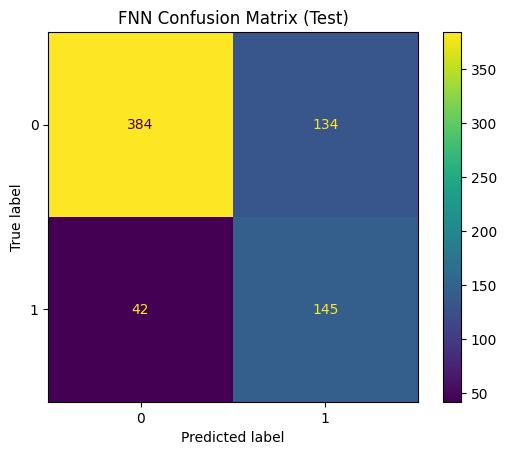

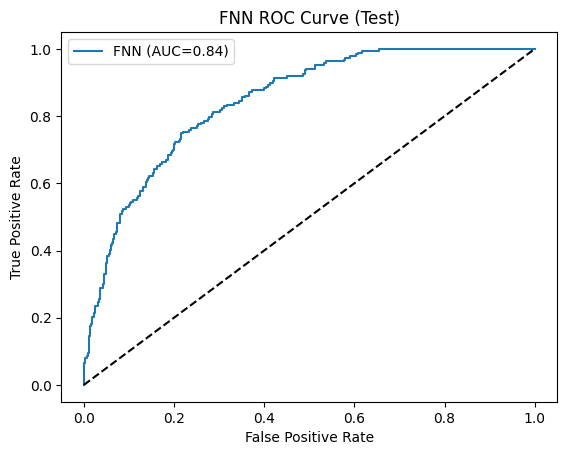

In [8]:
# Feed Forward Neural Network (FNN) with Optuna hyperparameter tuning (F1-based)
%pip install tensorflow-macos tensorflow-metal
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Deterministic TensorFlow config
tf.keras.utils.set_random_seed(SEED)
try:
    tf.config.experimental.enable_op_determinism()
except Exception:
    pass
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

# Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Custom callback for validation F1 early stopping
class F1EarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, patience=5):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.patience = patience
        self.best_f1 = -1
        self.wait = 0
        self.best_weights = None
        self.stopped_epoch = None  # added to record stopping epoch
    def on_epoch_end(self, epoch, logs=None):
        preds = (self.model.predict(self.X_val, verbose=0).ravel() > 0.5).astype(int)
        current_f1 = f1_score(self.y_val, preds)
        if current_f1 > self.best_f1:
            self.best_f1 = current_f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch + 1
                print(f'Early stopping at epoch {self.stopped_epoch}; best val F1={self.best_f1:.4f}')
                self.model.stop_training = True

def create_fnn_model(trial):
    n_units = trial.suggest_int('n_units', 16, 128)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    model = models.Sequential([
        layers.Input(shape=(X_train_proc.shape[1],)),
        layers.Dense(n_units, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
    return model

def objective_fnn(trial):
    model = create_fnn_model(trial)
    f1_callback = F1EarlyStopping(X_val_proc, y_val, patience=5)
    model.fit(
        X_train_proc, y_train,
        validation_data=(X_val_proc, y_val),
        epochs=30,
        batch_size=trial.suggest_int('batch_size', 32, 128),
        verbose=0,
        class_weight=class_weight_dict,
        callbacks=[f1_callback]
    )
    if f1_callback.stopped_epoch is not None:
        print(f'Trial early stopped at epoch {f1_callback.stopped_epoch} (best val F1={f1_callback.best_f1:.4f})')
    if f1_callback.best_weights is not None:
        model.set_weights(f1_callback.best_weights)
    return f1_callback.best_f1  # maximize F1

study_fnn = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_fnn.optimize(objective_fnn, n_trials=50, show_progress_bar=True)

# Train best FNN model with best params
best_params_fnn = study_fnn.best_params
print('Best FNN hyperparameters:', best_params_fnn)
best_fnn = create_fnn_model(optuna.trial.FixedTrial(best_params_fnn))
f1_callback_final = F1EarlyStopping(X_val_proc, y_val, patience=5)
best_fnn.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=30,
    batch_size=best_params_fnn['batch_size'],
    verbose=0,
    class_weight=class_weight_dict,
    callbacks=[f1_callback_final]
)
if f1_callback_final.stopped_epoch is not None:
    print(f'Final FNN early stopped at epoch {f1_callback_final.stopped_epoch} (best val F1={f1_callback_final.best_f1:.4f})')
if f1_callback_final.best_weights is not None:
    best_fnn.set_weights(f1_callback_final.best_weights)

# Evaluate on test set
pred_test_fnn = best_fnn.predict(X_test_proc).ravel()
pred_test_label_fnn = (pred_test_fnn > 0.5).astype(int)
cm_fnn = confusion_matrix(y_test, pred_test_label_fnn)
roc_auc_fnn = roc_auc_score(y_test, pred_test_fnn)
f1_fnn = f1_score(y_test, pred_test_label_fnn)
precision_fnn = precision_score(y_test, pred_test_label_fnn)
recall_fnn = recall_score(y_test, pred_test_label_fnn)
specificity_fnn = cm_fnn[0,0] / (cm_fnn[0,0] + cm_fnn[0,1]) if (cm_fnn[0,0] + cm_fnn[0,1]) > 0 else 0
accuracy_fnn = (cm_fnn[0,0] + cm_fnn[1,1]) / cm_fnn.sum()

print('FNN Test Results:')
print(f'Accuracy: {accuracy_fnn:.4f}')
print(f'F1 Score: {f1_fnn:.4f}')
print(f'Precision: {precision_fnn:.4f}')
print(f'Recall (Sensitivity): {recall_fnn:.4f}')
print(f'Specificity: {specificity_fnn:.4f}')
print(f'AUC: {roc_auc_fnn:.4f}')

ConfusionMatrixDisplay(cm_fnn).plot()
plt.title('FNN Confusion Matrix (Test)')
plt.show()

fpr_fnn, tpr_fnn, _ = roc_curve(y_test, pred_test_fnn)
plt.figure()
plt.plot(fpr_fnn, tpr_fnn, label=f'FNN (AUC={roc_auc_fnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN ROC Curve (Test)')
plt.legend()
plt.show()


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/shreyasshah/Desktop/Fall_2025/STA 221/ecs221/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[I 2025-12-04 16:32:47,494] A new study created in memory with name: no-name-c495d744-3dda-49c8-87fe-953299d676d7
  0%|          | 0/50 [00:00<?, ?it/s]2025-12-04 16:32:47.534756: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-12-04 16:32:47.534826: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-12-04 16:32:47.534843: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-12-04 16:32:47.534874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-04 16

Early stopping at epoch 8; best val F1=0.6432
Trial early stopped at epoch 8 (best val F1=0.6432)
[I 2025-12-04 16:33:15,877] Trial 0 finished with value: 0.6431924882629108 and parameters: {'n_layers': 3, 'n_units': 124, 'lr': 0.0029106359131330704, 'dropout': 0.2993292420985183, 'batch_size': 47}. Best is trial 0 with value: 0.6431924882629108.


Best trial: 0. Best value: 0.643192:   4%|▍         | 2/50 [00:56<22:37, 28.28s/it]

Early stopping at epoch 15; best val F1=0.6432
Trial early stopped at epoch 15 (best val F1=0.6432)
[I 2025-12-04 16:33:44,098] Trial 1 finished with value: 0.6431535269709544 and parameters: {'n_layers': 2, 'n_units': 37, 'lr': 0.005399484409787433, 'dropout': 0.3005575058716044, 'batch_size': 100}. Best is trial 0 with value: 0.6431924882629108.


Best trial: 0. Best value: 0.643192:   6%|▌         | 3/50 [01:29<23:57, 30.58s/it]

Early stopping at epoch 8; best val F1=0.6398
Trial early stopped at epoch 8 (best val F1=0.6398)
[I 2025-12-04 16:34:17,423] Trial 2 finished with value: 0.6398305084745762 and parameters: {'n_layers': 2, 'n_units': 126, 'lr': 0.004622589001020831, 'dropout': 0.10616955533913808, 'batch_size': 49}. Best is trial 0 with value: 0.6431924882629108.


Best trial: 3. Best value: 0.648536:   8%|▊         | 4/50 [01:48<19:42, 25.70s/it]

Early stopping at epoch 6; best val F1=0.6485
Trial early stopped at epoch 6 (best val F1=0.6485)
[I 2025-12-04 16:34:35,643] Trial 3 finished with value: 0.6485355648535565 and parameters: {'n_layers': 2, 'n_units': 61, 'lr': 0.0011207606211860567, 'dropout': 0.21597250932105788, 'batch_size': 60}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  10%|█         | 5/50 [02:34<24:46, 33.02s/it]

Early stopping at epoch 18; best val F1=0.6475
Trial early stopped at epoch 18 (best val F1=0.6475)
[I 2025-12-04 16:35:21,646] Trial 4 finished with value: 0.6475409836065574 and parameters: {'n_layers': 3, 'n_units': 45, 'lr': 0.0003839629299804173, 'dropout': 0.18318092164684585, 'batch_size': 76}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  12%|█▏        | 6/50 [03:47<34:12, 46.66s/it]

Early stopping at epoch 14; best val F1=0.6382
Trial early stopped at epoch 14 (best val F1=0.6382)
[I 2025-12-04 16:36:34,770] Trial 5 finished with value: 0.6382113821138211 and parameters: {'n_layers': 4, 'n_units': 51, 'lr': 0.0010677482709481358, 'dropout': 0.29620728443102123, 'batch_size': 36}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  14%|█▍        | 7/50 [04:18<29:52, 41.69s/it]

Early stopping at epoch 17; best val F1=0.6358
Trial early stopped at epoch 17 (best val F1=0.6358)
[I 2025-12-04 16:37:06,248] Trial 6 finished with value: 0.6357894736842106 and parameters: {'n_layers': 3, 'n_units': 48, 'lr': 0.00013492834268013249, 'dropout': 0.4744427686266666, 'batch_size': 125}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  16%|█▌        | 8/50 [05:14<32:22, 46.26s/it]

Early stopping at epoch 18; best val F1=0.6358
Trial early stopped at epoch 18 (best val F1=0.6358)
[I 2025-12-04 16:38:02,277] Trial 7 finished with value: 0.6357894736842106 and parameters: {'n_layers': 4, 'n_units': 61, 'lr': 0.0001567993391672301, 'dropout': 0.34211651325607845, 'batch_size': 74}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  18%|█▊        | 9/50 [05:54<30:10, 44.15s/it]

Early stopping at epoch 14; best val F1=0.6364
Trial early stopped at epoch 14 (best val F1=0.6364)
[I 2025-12-04 16:38:41,791] Trial 8 finished with value: 0.6363636363636364 and parameters: {'n_layers': 2, 'n_units': 80, 'lr': 0.00011715937392307068, 'dropout': 0.45466020103939103, 'batch_size': 57}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  20%|██        | 10/50 [06:25<26:44, 40.12s/it]

Early stopping at epoch 7; best val F1=0.6446
Trial early stopped at epoch 7 (best val F1=0.6446)
[I 2025-12-04 16:39:12,891] Trial 9 finished with value: 0.6446280991735537 and parameters: {'n_layers': 3, 'n_units': 62, 'lr': 0.001096821720752952, 'dropout': 0.2733551396716398, 'batch_size': 49}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  22%|██▏       | 11/50 [06:50<23:03, 35.48s/it]

Early stopping at epoch 10; best val F1=0.6433
Trial early stopped at epoch 10 (best val F1=0.6433)
[I 2025-12-04 16:39:37,839] Trial 10 finished with value: 0.643298969072165 and parameters: {'n_layers': 2, 'n_units': 99, 'lr': 0.0004489223153856222, 'dropout': 0.0089809378074098, 'batch_size': 95}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  24%|██▍       | 12/50 [07:18<20:58, 33.12s/it]

Early stopping at epoch 9; best val F1=0.6379
Trial early stopped at epoch 9 (best val F1=0.6379)
[I 2025-12-04 16:40:05,580] Trial 11 finished with value: 0.6378600823045267 and parameters: {'n_layers': 3, 'n_units': 77, 'lr': 0.0004102071524875, 'dropout': 0.16585362764653921, 'batch_size': 78}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  26%|██▌       | 13/50 [07:48<19:58, 32.39s/it]

Early stopping at epoch 6; best val F1=0.6473
Trial early stopped at epoch 6 (best val F1=0.6473)
[I 2025-12-04 16:40:36,296] Trial 12 finished with value: 0.6473029045643154 and parameters: {'n_layers': 4, 'n_units': 33, 'lr': 0.0004562434158247464, 'dropout': 0.15361569135213612, 'batch_size': 65}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  28%|██▊       | 14/50 [08:10<17:35, 29.32s/it]

Early stopping at epoch 6; best val F1=0.6405
Trial early stopped at epoch 6 (best val F1=0.6405)
[I 2025-12-04 16:40:58,515] Trial 13 finished with value: 0.640495867768595 and parameters: {'n_layers': 2, 'n_units': 67, 'lr': 0.0017765788649801962, 'dropout': 0.19737731961812158, 'batch_size': 94}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 3. Best value: 0.648536:  30%|███       | 15/50 [08:42<17:27, 29.92s/it]

Early stopping at epoch 7; best val F1=0.6352
Trial early stopped at epoch 7 (best val F1=0.6352)
[I 2025-12-04 16:41:29,827] Trial 14 finished with value: 0.6352459016393442 and parameters: {'n_layers': 3, 'n_units': 98, 'lr': 0.0003013414410470946, 'dropout': 0.06532561675616533, 'batch_size': 70}. Best is trial 3 with value: 0.6485355648535565.


Best trial: 15. Best value: 0.649289:  32%|███▏      | 16/50 [09:09<16:27, 29.03s/it]

Early stopping at epoch 10; best val F1=0.6493
Trial early stopped at epoch 10 (best val F1=0.6493)
[I 2025-12-04 16:41:56,805] Trial 15 finished with value: 0.6492890995260664 and parameters: {'n_layers': 2, 'n_units': 47, 'lr': 0.009818226878189128, 'dropout': 0.21845736458959036, 'batch_size': 85}. Best is trial 15 with value: 0.6492890995260664.


Best trial: 15. Best value: 0.649289:  34%|███▍      | 17/50 [09:34<15:24, 28.02s/it]

Early stopping at epoch 10; best val F1=0.6449
Trial early stopped at epoch 10 (best val F1=0.6449)
[I 2025-12-04 16:42:22,470] Trial 16 finished with value: 0.6448598130841121 and parameters: {'n_layers': 2, 'n_units': 93, 'lr': 0.00694703636534955, 'dropout': 0.2326621743731212, 'batch_size': 110}. Best is trial 15 with value: 0.6492890995260664.


Best trial: 15. Best value: 0.649289:  36%|███▌      | 18/50 [10:00<14:28, 27.14s/it]

Early stopping at epoch 8; best val F1=0.6457
Trial early stopped at epoch 8 (best val F1=0.6457)
[I 2025-12-04 16:42:47,542] Trial 17 finished with value: 0.6457023060796646 and parameters: {'n_layers': 2, 'n_units': 55, 'lr': 0.008524636948952195, 'dropout': 0.40156383302192694, 'batch_size': 87}. Best is trial 15 with value: 0.6492890995260664.


Best trial: 15. Best value: 0.649289:  38%|███▊      | 19/50 [10:32<14:49, 28.68s/it]

Early stopping at epoch 9; best val F1=0.6458
Trial early stopped at epoch 9 (best val F1=0.6458)
[I 2025-12-04 16:43:19,820] Trial 18 finished with value: 0.6458333333333334 and parameters: {'n_layers': 2, 'n_units': 71, 'lr': 0.0027980566137757973, 'dropout': 0.38211600274419943, 'batch_size': 63}. Best is trial 15 with value: 0.6492890995260664.


Best trial: 15. Best value: 0.649289:  40%|████      | 20/50 [10:55<13:34, 27.14s/it]

Early stopping at epoch 7; best val F1=0.6403
Trial early stopped at epoch 7 (best val F1=0.6403)
[I 2025-12-04 16:43:43,361] Trial 19 finished with value: 0.6403326403326404 and parameters: {'n_layers': 2, 'n_units': 86, 'lr': 0.0007062033329756319, 'dropout': 0.08823046035526269, 'batch_size': 111}. Best is trial 15 with value: 0.6492890995260664.


Best trial: 20. Best value: 0.655172:  42%|████▏     | 21/50 [11:32<14:28, 29.93s/it]

Early stopping at epoch 6; best val F1=0.6552
Trial early stopped at epoch 6 (best val F1=0.6552)
[I 2025-12-04 16:44:19,812] Trial 20 finished with value: 0.6551724137931034 and parameters: {'n_layers': 2, 'n_units': 39, 'lr': 0.001950168777044116, 'dropout': 0.22166371009972463, 'batch_size': 32}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  44%|████▍     | 22/50 [12:13<15:31, 33.29s/it]

Early stopping at epoch 9; best val F1=0.6424
Trial early stopped at epoch 9 (best val F1=0.6424)
[I 2025-12-04 16:45:00,914] Trial 21 finished with value: 0.6423982869379015 and parameters: {'n_layers': 2, 'n_units': 41, 'lr': 0.0017864705023163873, 'dropout': 0.23891287001945344, 'batch_size': 38}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  46%|████▌     | 23/50 [13:37<21:49, 48.50s/it]

Early stopping at epoch 18; best val F1=0.6474
Trial early stopped at epoch 18 (best val F1=0.6474)
[I 2025-12-04 16:46:24,898] Trial 22 finished with value: 0.6474226804123712 and parameters: {'n_layers': 2, 'n_units': 32, 'lr': 0.0017389929268689637, 'dropout': 0.21881286350991674, 'batch_size': 32}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  48%|████▊     | 24/50 [14:10<19:00, 43.88s/it]

Early stopping at epoch 12; best val F1=0.6460
Trial early stopped at epoch 12 (best val F1=0.6460)
[I 2025-12-04 16:46:58,005] Trial 23 finished with value: 0.6459627329192547 and parameters: {'n_layers': 2, 'n_units': 58, 'lr': 0.0034396759052450123, 'dropout': 0.13714854843993418, 'batch_size': 83}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  50%|█████     | 25/50 [14:46<17:17, 41.50s/it]

Early stopping at epoch 8; best val F1=0.6414
Trial early stopped at epoch 8 (best val F1=0.6414)
[I 2025-12-04 16:47:33,944] Trial 24 finished with value: 0.6414253897550112 and parameters: {'n_layers': 2, 'n_units': 44, 'lr': 0.009943948942518462, 'dropout': 0.3338962247920462, 'batch_size': 57}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  52%|█████▏    | 26/50 [15:49<19:12, 48.04s/it]

Early stopping at epoch 14; best val F1=0.6420
Trial early stopped at epoch 14 (best val F1=0.6420)
[I 2025-12-04 16:48:37,245] Trial 25 finished with value: 0.6419753086419753 and parameters: {'n_layers': 3, 'n_units': 50, 'lr': 0.0013783982506949226, 'dropout': 0.2598100232743129, 'batch_size': 43}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  54%|█████▍    | 27/50 [16:40<18:45, 48.92s/it]

Early stopping at epoch 15; best val F1=0.6460
Trial early stopped at epoch 15 (best val F1=0.6460)
[I 2025-12-04 16:49:28,219] Trial 26 finished with value: 0.6459627329192547 and parameters: {'n_layers': 2, 'n_units': 71, 'lr': 0.0007038829258928828, 'dropout': 0.20048311882612477, 'batch_size': 59}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  56%|█████▌    | 28/50 [17:06<15:25, 42.06s/it]

Early stopping at epoch 8; best val F1=0.6462
Trial early stopped at epoch 8 (best val F1=0.6462)
[I 2025-12-04 16:49:54,292] Trial 27 finished with value: 0.6462167689161554 and parameters: {'n_layers': 2, 'n_units': 41, 'lr': 0.0007063227037985642, 'dropout': 0.1272907575993808, 'batch_size': 86}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  58%|█████▊    | 29/50 [18:22<18:15, 52.15s/it]

Early stopping at epoch 17; best val F1=0.6448
Trial early stopped at epoch 17 (best val F1=0.6448)
[I 2025-12-04 16:51:09,989] Trial 28 finished with value: 0.6447638603696099 and parameters: {'n_layers': 3, 'n_units': 53, 'lr': 0.00020432327158098547, 'dropout': 0.0428621466573782, 'batch_size': 69}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  60%|██████    | 30/50 [19:20<17:58, 53.90s/it]

Early stopping at epoch 10; best val F1=0.6518
Trial early stopped at epoch 10 (best val F1=0.6518)
[I 2025-12-04 16:52:07,971] Trial 29 finished with value: 0.6517857142857143 and parameters: {'n_layers': 3, 'n_units': 116, 'lr': 0.002602838515945304, 'dropout': 0.28010615163442953, 'batch_size': 45}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 20. Best value: 0.655172:  62%|██████▏   | 31/50 [20:11<16:49, 53.14s/it]

Early stopping at epoch 8; best val F1=0.6511
Trial early stopped at epoch 8 (best val F1=0.6511)
[I 2025-12-04 16:52:59,317] Trial 30 finished with value: 0.6510638297872341 and parameters: {'n_layers': 4, 'n_units': 117, 'lr': 0.002811722580700805, 'dropout': 0.3501439166248972, 'batch_size': 43}. Best is trial 20 with value: 0.6551724137931034.


Best trial: 31. Best value: 0.664962:  64%|██████▍   | 32/50 [21:33<18:30, 61.68s/it]

Early stopping at epoch 11; best val F1=0.6650
Trial early stopped at epoch 11 (best val F1=0.6650)
[I 2025-12-04 16:54:20,917] Trial 31 finished with value: 0.6649616368286445 and parameters: {'n_layers': 4, 'n_units': 106, 'lr': 0.0030165923569147064, 'dropout': 0.33513758905539126, 'batch_size': 42}. Best is trial 31 with value: 0.6649616368286445.
Early stopping at epoch 12; best val F1=0.6562
Trial early stopped at epoch 12 (best val F1=0.6562)


Best trial: 31. Best value: 0.664962:  66%|██████▌   | 33/50 [22:53<19:03, 67.28s/it]

[I 2025-12-04 16:55:41,126] Trial 32 finished with value: 0.65625 and parameters: {'n_layers': 4, 'n_units': 115, 'lr': 0.0028033372560838346, 'dropout': 0.34931858069571453, 'batch_size': 44}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  68%|██████▊   | 34/50 [24:16<19:12, 72.05s/it]

Early stopping at epoch 13; best val F1=0.6440
Trial early stopped at epoch 13 (best val F1=0.6440)
[I 2025-12-04 16:57:04,447] Trial 33 finished with value: 0.643979057591623 and parameters: {'n_layers': 4, 'n_units': 116, 'lr': 0.004186781940295094, 'dropout': 0.3926177680968811, 'batch_size': 52}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  70%|███████   | 35/50 [25:38<18:43, 74.93s/it]

Early stopping at epoch 9; best val F1=0.6433
Trial early stopped at epoch 9 (best val F1=0.6433)
[I 2025-12-04 16:58:26,081] Trial 34 finished with value: 0.643298969072165 and parameters: {'n_layers': 4, 'n_units': 108, 'lr': 0.0023429889127411655, 'dropout': 0.3096991554041501, 'batch_size': 44}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  72%|███████▏  | 36/50 [27:16<19:07, 81.96s/it]

Early stopping at epoch 7; best val F1=0.6383
Trial early stopped at epoch 7 (best val F1=0.6383)
[I 2025-12-04 17:00:04,450] Trial 35 finished with value: 0.6382978723404256 and parameters: {'n_layers': 4, 'n_units': 120, 'lr': 0.005888433852446592, 'dropout': 0.27998798932813274, 'batch_size': 37}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  74%|███████▍  | 37/50 [28:54<18:46, 86.68s/it]

Early stopping at epoch 8; best val F1=0.6457
Trial early stopped at epoch 8 (best val F1=0.6457)
[I 2025-12-04 17:01:42,155] Trial 36 finished with value: 0.6456692913385826 and parameters: {'n_layers': 4, 'n_units': 110, 'lr': 0.00389666537554857, 'dropout': 0.3149034118171746, 'batch_size': 33}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  76%|███████▌  | 38/50 [29:46<15:13, 76.10s/it]

Early stopping at epoch 7; best val F1=0.6526
Trial early stopped at epoch 7 (best val F1=0.6526)
[I 2025-12-04 17:02:33,560] Trial 37 finished with value: 0.6525821596244131 and parameters: {'n_layers': 4, 'n_units': 127, 'lr': 0.0021015210432801562, 'dropout': 0.43031754178517195, 'batch_size': 51}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  78%|███████▊  | 39/50 [31:07<14:14, 77.65s/it]

Early stopping at epoch 14; best val F1=0.6449
Trial early stopped at epoch 14 (best val F1=0.6449)
[I 2025-12-04 17:03:54,844] Trial 38 finished with value: 0.644880174291939 and parameters: {'n_layers': 4, 'n_units': 128, 'lr': 0.005371709681236378, 'dropout': 0.42202275241816384, 'batch_size': 51}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  80%|████████  | 40/50 [32:20<12:44, 76.45s/it]

Early stopping at epoch 10; best val F1=0.6446
Trial early stopped at epoch 10 (best val F1=0.6446)
[I 2025-12-04 17:05:08,478] Trial 39 finished with value: 0.6446280991735537 and parameters: {'n_layers': 4, 'n_units': 107, 'lr': 0.002177813005057181, 'dropout': 0.43092086586877665, 'batch_size': 40}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  82%|████████▏ | 41/50 [33:45<11:49, 78.85s/it]

Early stopping at epoch 13; best val F1=0.6393
Trial early stopped at epoch 13 (best val F1=0.6393)
[I 2025-12-04 17:06:32,944] Trial 40 finished with value: 0.639344262295082 and parameters: {'n_layers': 4, 'n_units': 123, 'lr': 0.0013842018106753058, 'dropout': 0.48696181110062975, 'batch_size': 53}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  84%|████████▍ | 42/50 [34:39<09:31, 71.46s/it]

Early stopping at epoch 8; best val F1=0.6370
Trial early stopped at epoch 8 (best val F1=0.6370)
[I 2025-12-04 17:07:27,141] Trial 41 finished with value: 0.6369710467706013 and parameters: {'n_layers': 3, 'n_units': 112, 'lr': 0.0032068581344333684, 'dropout': 0.36655768221290963, 'batch_size': 48}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  86%|████████▌ | 43/50 [35:45<08:08, 69.74s/it]

Early stopping at epoch 9; best val F1=0.6362
Trial early stopped at epoch 9 (best val F1=0.6362)
[I 2025-12-04 17:08:32,892] Trial 42 finished with value: 0.6361746361746362 and parameters: {'n_layers': 4, 'n_units': 104, 'lr': 0.00221624142118048, 'dropout': 0.3201129053466451, 'batch_size': 44}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  88%|████████▊ | 44/50 [37:30<08:02, 80.45s/it]

Early stopping at epoch 16; best val F1=0.6433
Trial early stopped at epoch 16 (best val F1=0.6433)
[I 2025-12-04 17:10:18,322] Trial 43 finished with value: 0.643298969072165 and parameters: {'n_layers': 3, 'n_units': 123, 'lr': 0.0013969521043857049, 'dropout': 0.4503559254735411, 'batch_size': 32}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  90%|█████████ | 45/50 [39:03<07:00, 84.04s/it]

Early stopping at epoch 10; best val F1=0.6504
Trial early stopped at epoch 10 (best val F1=0.6504)
[I 2025-12-04 17:11:50,750] Trial 44 finished with value: 0.6503667481662592 and parameters: {'n_layers': 4, 'n_units': 116, 'lr': 0.004876375671952256, 'dropout': 0.2898620950955829, 'batch_size': 39}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  92%|█████████▏| 46/50 [40:04<05:08, 77.24s/it]

Early stopping at epoch 9; best val F1=0.6406
Trial early stopped at epoch 9 (best val F1=0.6406)
[I 2025-12-04 17:12:52,110] Trial 45 finished with value: 0.6405529953917051 and parameters: {'n_layers': 3, 'n_units': 102, 'lr': 0.002612102626417933, 'dropout': 0.3556694384412289, 'batch_size': 47}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  94%|█████████▍| 47/50 [42:15<04:40, 93.36s/it]

Early stopping at epoch 18; best val F1=0.6555
Trial early stopped at epoch 18 (best val F1=0.6555)
[I 2025-12-04 17:15:03,087] Trial 46 finished with value: 0.6555323590814196 and parameters: {'n_layers': 4, 'n_units': 128, 'lr': 0.0009081782941732456, 'dropout': 0.26109896391395193, 'batch_size': 36}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  96%|█████████▌| 48/50 [43:42<03:02, 91.47s/it]

Early stopping at epoch 10; best val F1=0.6432
Trial early stopped at epoch 10 (best val F1=0.6432)
[I 2025-12-04 17:16:30,157] Trial 47 finished with value: 0.6431535269709544 and parameters: {'n_layers': 4, 'n_units': 126, 'lr': 0.000935320474441388, 'dropout': 0.42262217389758794, 'batch_size': 36}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962:  98%|█████████▊| 49/50 [44:53<01:25, 85.35s/it]

Early stopping at epoch 8; best val F1=0.6457
Trial early stopped at epoch 8 (best val F1=0.6457)
[I 2025-12-04 17:17:41,217] Trial 48 finished with value: 0.6457023060796646 and parameters: {'n_layers': 4, 'n_units': 94, 'lr': 0.0008942045357810681, 'dropout': 0.2658682945802777, 'batch_size': 40}. Best is trial 31 with value: 0.6649616368286445.


Best trial: 31. Best value: 0.664962: 100%|██████████| 50/50 [46:52<00:00, 56.24s/it]

Early stopping at epoch 10; best val F1=0.6426
Trial early stopped at epoch 10 (best val F1=0.6426)
[I 2025-12-04 17:19:39,513] Trial 49 finished with value: 0.6425531914893617 and parameters: {'n_layers': 4, 'n_units': 128, 'lr': 0.0005455903912706116, 'dropout': 0.24623234743540434, 'batch_size': 55}. Best is trial 31 with value: 0.6649616368286445.
Best MLP hyperparameters: {'n_layers': 4, 'n_units': 106, 'lr': 0.0030165923569147064, 'dropout': 0.33513758905539126, 'batch_size': 42}


Early stopping at epoch 7; best val F1=0.6484
Final MLP early stopped at epoch 7 (best val F1=0.6484)
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MLP Test Results:
Accuracy: 0.7574
F1 Score: 0.6258
Precision: 0.5296
Recall (Sensitivity): 0.7647
Specificity: 0.7548
AUC: 0.8458


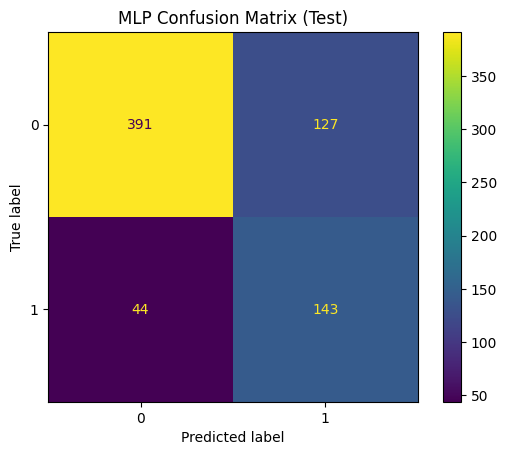

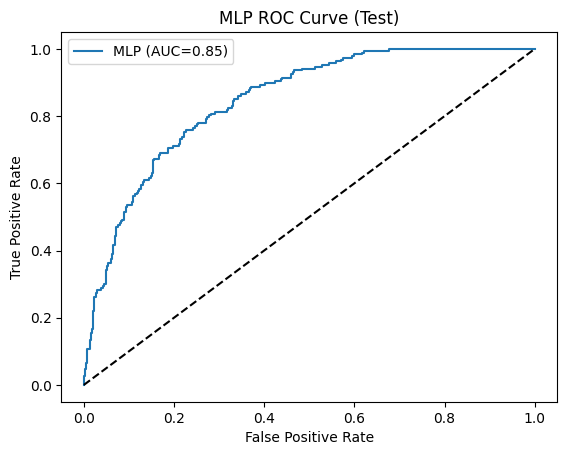

In [8]:
# Multi-Layer Perceptron (MLP) with Optuna hyperparameter tuning (F1-based)
# F1EarlyStopping already defined in previous cell
%pip install tensorflow-macos tensorflow-metal
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Deterministic TensorFlow config
tf.keras.utils.set_random_seed(SEED)
try:
    tf.config.experimental.enable_op_determinism()
except Exception:
    pass
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

# Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Custom callback for validation F1 early stopping
class F1EarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, patience=5):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.patience = patience
        self.best_f1 = -1
        self.wait = 0
        self.best_weights = None
        self.stopped_epoch = None  # added to record stopping epoch
    def on_epoch_end(self, epoch, logs=None):
        preds = (self.model.predict(self.X_val, verbose=0).ravel() > 0.5).astype(int)
        current_f1 = f1_score(self.y_val, preds)
        if current_f1 > self.best_f1:
            self.best_f1 = current_f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch + 1
                print(f'Early stopping at epoch {self.stopped_epoch}; best val F1={self.best_f1:.4f}')
                self.model.stop_training = True
                
def create_mlp_model(trial):
    n_layers = trial.suggest_int('n_layers', 2, 4)
    n_units = trial.suggest_int('n_units', 32, 128)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_proc.shape[1],)))
    for _ in range(n_layers):
        model.add(layers.Dense(n_units, activation='relu'))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
    return model

def objective_mlp(trial):
    model = create_mlp_model(trial)
    f1_callback = F1EarlyStopping(X_val_proc, y_val, patience=5)
    model.fit(
        X_train_proc, y_train,
        validation_data=(X_val_proc, y_val),
        epochs=30,
        batch_size=trial.suggest_int('batch_size', 32, 128),
        verbose=0,
        class_weight=class_weight_dict,
        callbacks=[f1_callback]
    )
    if f1_callback.stopped_epoch is not None:
        print(f'Trial early stopped at epoch {f1_callback.stopped_epoch} (best val F1={f1_callback.best_f1:.4f})')
    if f1_callback.best_weights is not None:
        model.set_weights(f1_callback.best_weights)
    return f1_callback.best_f1  # maximize F1

study_mlp = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_mlp.optimize(objective_mlp, n_trials=50, show_progress_bar=True)

best_params_mlp = study_mlp.best_params
print('Best MLP hyperparameters:', best_params_mlp)
best_mlp = create_mlp_model(optuna.trial.FixedTrial(best_params_mlp))
f1_callback_final = F1EarlyStopping(X_val_proc, y_val, patience=5)
best_mlp.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=30,
    batch_size=best_params_mlp['batch_size'],
    verbose=0,
    class_weight=class_weight_dict,
    callbacks=[f1_callback_final]
)
if f1_callback_final.stopped_epoch is not None:
    print(f'Final MLP early stopped at epoch {f1_callback_final.stopped_epoch} (best val F1={f1_callback_final.best_f1:.4f})')
if f1_callback_final.best_weights is not None:
    best_mlp.set_weights(f1_callback_final.best_weights)

# Evaluate on test set
pred_test_mlp = best_mlp.predict(X_test_proc).ravel()
pred_test_label_mlp = (pred_test_mlp > 0.5).astype(int)
cm_mlp = confusion_matrix(y_test, pred_test_label_mlp)
roc_auc_mlp = roc_auc_score(y_test, pred_test_mlp)
f1_mlp = f1_score(y_test, pred_test_label_mlp)
precision_mlp = precision_score(y_test, pred_test_label_mlp)
recall_mlp = recall_score(y_test, pred_test_label_mlp)
specificity_mlp = cm_mlp[0,0] / (cm_mlp[0,0] + cm_mlp[0,1]) if (cm_mlp[0,0] + cm_mlp[0,1]) > 0 else 0
accuracy_mlp = (cm_mlp[0,0] + cm_mlp[1,1]) / cm_mlp.sum()

print('MLP Test Results:')
print(f'Accuracy: {accuracy_mlp:.4f}')
print(f'F1 Score: {f1_mlp:.4f}')
print(f'Precision: {precision_mlp:.4f}')
print(f'Recall (Sensitivity): {recall_mlp:.4f}')
print(f'Specificity: {specificity_mlp:.4f}')
print(f'AUC: {roc_auc_mlp:.4f}')

ConfusionMatrixDisplay(cm_mlp).plot()
plt.title('MLP Confusion Matrix (Test)')
plt.show()

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, pred_test_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC={roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve (Test)')
plt.legend()
plt.show()